# Batch convert shapefile to GeoJSON
___

## AIM
The aim is to easily convert the ***ERSI shapefile*** filetype to the open source ***GeoJSON*** filetype.

## CODE

In [1]:
import os
from glob import glob

# import gui tkinter
from tkinter import Tk
import tkinter.filedialog as tkfd

# to do the converstion
import shapefile
from json import dumps

# for inline visualisation
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

### Set input (shapefiles) and output (geojson) folders.

In [2]:
root = Tk()
input_directory = tkfd.askdirectory(title = "Select input folder", 
                         initialdir = "C:/")
output_directory = tkfd.askdirectory(title = "Select output folder", 
                         initialdir = "C:/")
root.destroy()

### Convert shapefiles to GeoJSON

**EXAMPLE**

Let's have a look at the shapefiles in the directory

In [15]:
for path in glob(os.path.join(input_directory,"**", "*.shp"),recursive=True):
    print(path)

C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\line_example.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\point_example.shp
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/example_shapefiles\polygon_example.shp


Load the shapefiiles from the set folder, convert them to GeoJSON and write the GeoJSON files to the output folder.

In [16]:
for path in glob(os.path.join(input_directory,"**", "*.shp"),recursive=True):
    # define the filename
    basename = os.path.basename(path)
    filename, file_extention = os.path.splitext(basename)
    # read the shapefile
    reader = shapefile.Reader(path)
    fields = reader.fields[1:]
    field_names = [field[0] for field in fields]
    buffer = []
    for sr in reader.shapeRecords():
        atr = dict(zip(field_names, sr.record))
        geom = sr.shape.__geo_interface__
        buffer.append(dict(type="Feature", geometry=geom, properties=atr)) 
   
    # write the GeoJSON file
    geojson = open(output_directory + "/" + filename + ".geojson", "w")
    geojson.write(dumps({"type": "FeatureCollection", "features": buffer}, indent=2) + "\n")
    geojson.close()

**EXAMPLE**

Check the output folder for the newly created GeoJSON files.

In [17]:
for path in glob(os.path.join(output_directory,"**", "*.geojson"),recursive=True):
    print(path)

C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\line_example.geojson
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\point_example.geojson
C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson\polygon_example.geojson


EXAMPLE

Load and plot one of the created GeoJSON files.

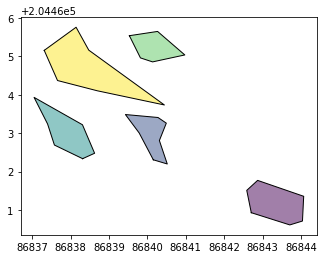

In [21]:
output_check_polygon = gpd.read_file("C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson/polygon_example.geojson")
output_check_polygon.plot()

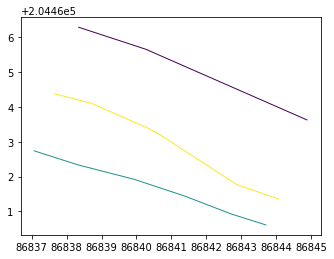

In [20]:
output_check_line = gpd.read_file("C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson/line_example.geojson")
output_check_line.plot()

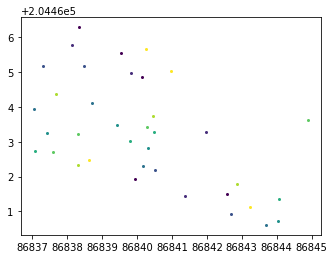

In [23]:
output_check_point = gpd.read_file("C:/WERKMAP/Anaconda/shapefile_geojson_shapefile/output_geojson/point_example.geojson")
output_check_point.plot()